**Task : 1 Credit Scoring Model**

Objective: Predict an individual's creditworthiness using past financial data.
Approach: Use classification algorithms like Logistic Regression, Decision Trees, or Random Forest.
**Key Features:**
● Feature engineering from financial history.
● Model accuracy assessment using metrics like Precision, Recall, F1-Score, ROC-AUC.
● **Dataset could include:** income, debts, payment history, etc.

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
# 2. Load Dataset
df = pd.read_csv("/content/UCI_Credit_Card.csv")

print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.mon

In [ ]:
# 3. Rename Target
df.rename(columns={"default.payment.next.month": "default"}, inplace=True)

In [ ]:
# 4. Features & Target
X = df.drop(["ID", "default"], axis=1)
y = df["default"]

In [ ]:
# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
# 6. Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 7. Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10)
}

In [ ]:
# 8. Train + Evaluate
roc_results = {}

for name, model in models.items():
    print(f"\n==============================")
    print(f"MODEL: {name}")
    print("==============================")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    roc = roc_auc_score(y_test, y_proba)
    roc_results[name] = roc
    print(f"ROC-AUC Score: {roc:.4f}")


MODEL: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.70      0.24      0.36      1659

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500

Confusion Matrix:
[[5672  169]
 [1259  400]]
ROC-AUC Score: 0.7155

MODEL: Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.66      0.36      0.47      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Confusion Matrix:
[[5535  306]
 [1061  598]]
ROC-AUC Score: 0.7463

MODEL: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0 

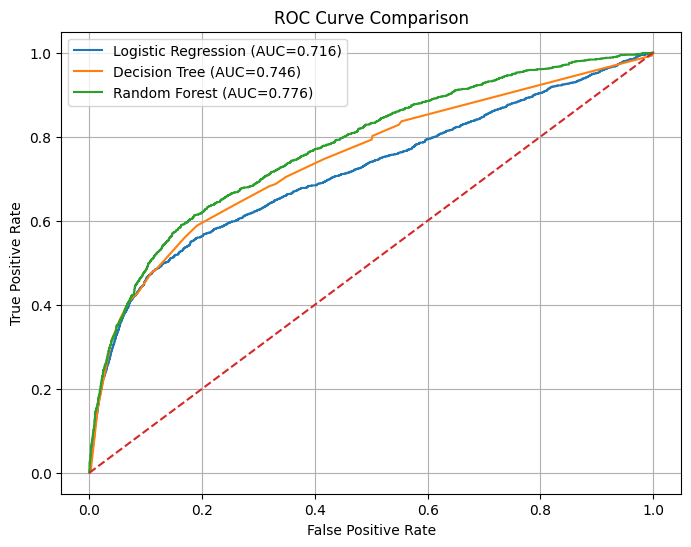

In [ ]:
# 9. Plot ROC Curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 10. Best Model Print
best_model = max(roc_results, key=roc_results.get)
print("\n===================================================")
print(f" BEST MODEL BASED ON ROC-AUC: {best_model}")
print("===================================================")


 BEST MODEL BASED ON ROC-AUC: Random Forest
